<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2024-03-30 08:08:09--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite’

m4_survey_data.sqli 100%[===================>]  34.98M  35.5MB/s    in 1.0s    

2024-03-30 08:08:11 (35.5 MB/s) - ‘m4_survey_data.sqlite’ saved [36679680/36679680]



Connect to the database.


In [1]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Demo: How to run an sql query


In [3]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [4]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [5]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [6]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])


CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

In [7]:
Query = """SELECT ConvertedComp FROM master"""

Hist = pd.read_sql_query(Query,conn)
Hist.isnull().sum()
Hist.fillna(value=0, inplace=True)
Hist.describe()

,ConvertedComp
count,1.139800e+04
mean,1.221755e+05
std,2.860567e+05
min,0.000000e+00
25%,1.966800e+04
50%,5.325000e+04
75%,9.500000e+04
max,2.000000e+06


# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


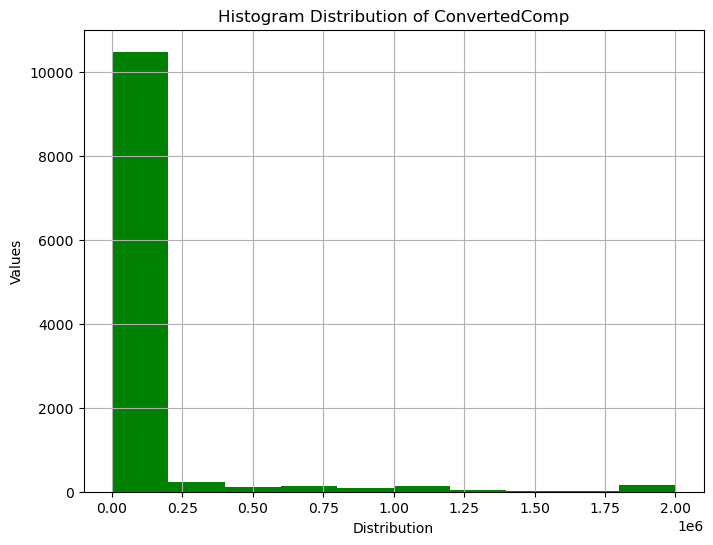

In [8]:
# your code goes here
plt.figure(figsize=(8,6))
plt.hist(Hist, color="green") 
plt.title("Histogram Distribution of ConvertedComp")
plt.xlabel("Distribution")
plt.ylabel("Values")
plt.grid()
plt.show()


### Box Plots


Plot a box plot of `Age.`


<function matplotlib.pyplot.show(close=None, block=None)>

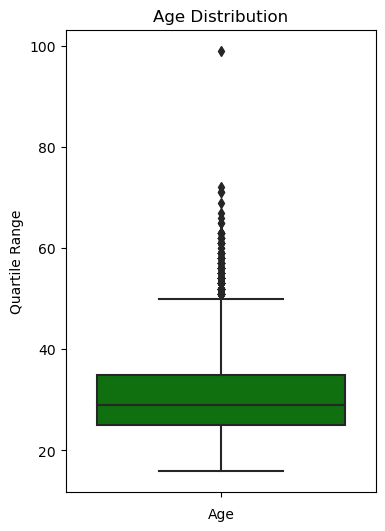

In [10]:
# your code goes here
QueryAge = """SELECT Age FROM master"""

BoxAge = pd.read_sql_query(QueryAge, conn)

plt.figure(figsize=(4,6))
sns.boxplot(BoxAge, orient="vertical", color="green")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Quartile Range")
plt.show


## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


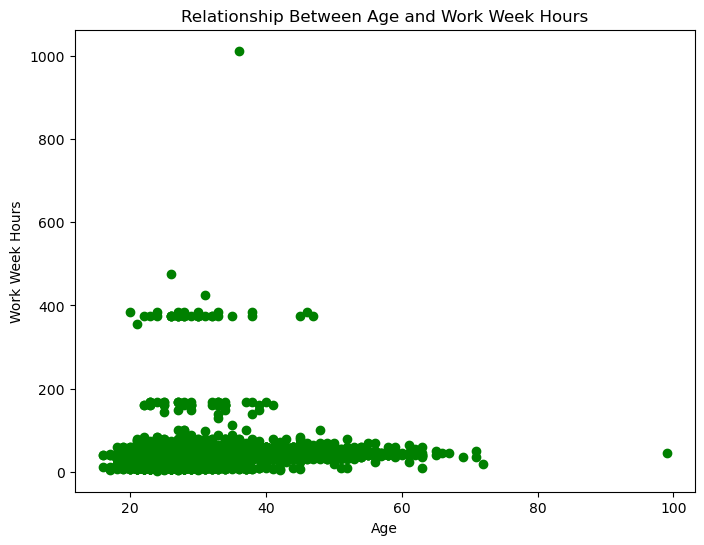

In [11]:
# your code goes here
QueryAgeWork = """SELECT Age, WorkWeekHrs FROM master"""

ScatAgeWork = pd.read_sql_query(QueryAgeWork, conn)

plt.figure(figsize=(8,6))
plt.scatter(x=ScatAgeWork["Age"], y=ScatAgeWork["WorkWeekHrs"], color="green") 
plt.title("Relationship Between Age and Work Week Hours")
plt.xlabel("Age")
plt.ylabel("Work Week Hours")
plt.show()

In [29]:
ScatAgeWork.corr()

,Age,WorkWeekHrs
Age,1.000000,0.036517
WorkWeekHrs,0.036517,1.000000


### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


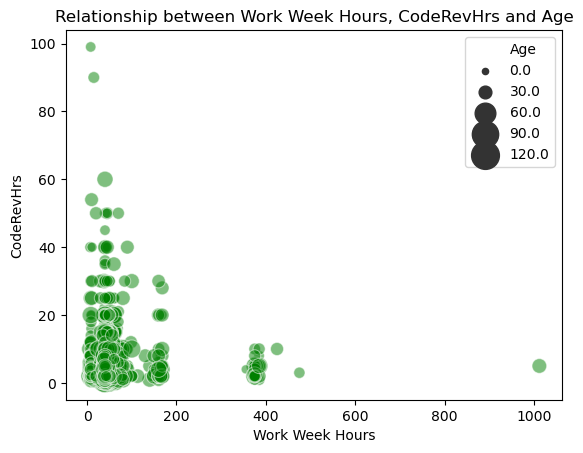

In [13]:
# your code goes here
QueryWCA = """ SELECT WorkWeekHrs, CodeRevHrs, Age FROM master"""

WCA = pd.read_sql_query(QueryWCA, conn)
WCA["CodeRevHrs"].fillna(value=2.0, inplace=True)

#plt.figure(figsize=(8,6
sns.scatterplot(data=WCA, x=WCA["WorkWeekHrs"], y=WCA["CodeRevHrs"], size=WCA["Age"], alpha=0.5, sizes=(20,400), color="green")
plt.title("Relationship between Work Week Hours, CodeRevHrs and Age")
plt.xlabel("Work Week Hours")
plt.show()


## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


                        Respondent
DatabaseDesireNextYear            
PostgreSQL                    4328
MongoDB                       3649
Redis                         3331
MySQL                         3281
Elasticsearch                 2856


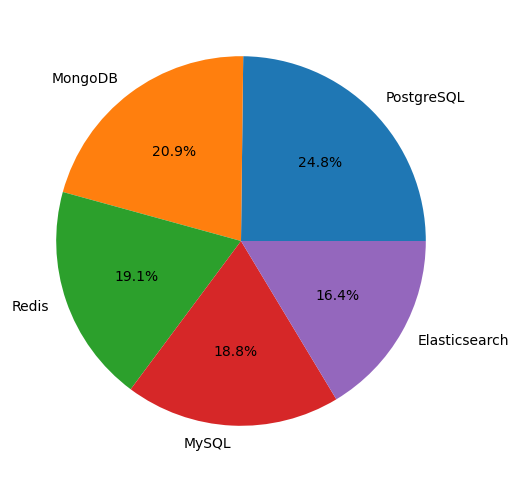

In [14]:
# your code goes here
QueryD = """SELECT * FROM DatabaseDesireNextYear"""

Database = pd.read_sql_query(QueryD, conn)
PieData = pd.DataFrame(Database.groupby(["DatabaseDesireNextYear"])["Respondent"].count().sort_values(ascending=False))
PieChart = PieData.head()
print(PieChart)
plt.figure(figsize=(8,6))
plt.pie(PieChart["Respondent"], labels=PieChart.index, autopct="%1.1f%%") 
plt.show()


In [48]:
QueryL = """SELECT * FROM DevType
"""

DatabaseL = pd.read_sql_query(QueryL, conn)
DatabaseL
PieDataL = pd.DataFrame(DatabaseL.groupby(["DevType"])["Respondent"].count().sort_values(ascending=False))
PieDataL

,Respondent
DevType,
"Developer, full-stack",6928
"Developer, back-end",6290
"Developer, front-end",3920
"Developer, desktop or enterprise applications",2575
"Developer, mobile",1959
DevOps specialist,1639
Database administrator,1413
System administrator,1202
Designer,988


### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


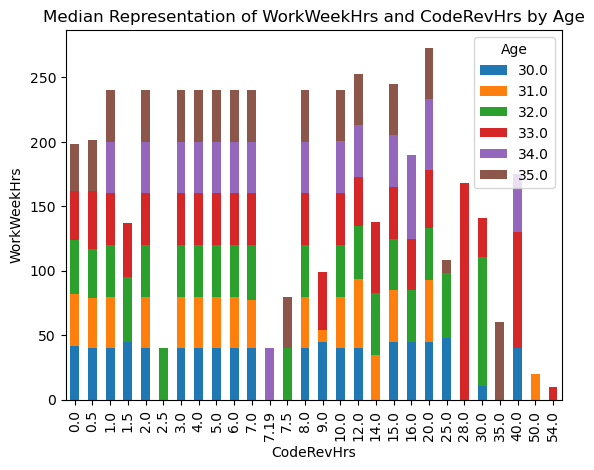

In [15]:
# your code goes here
QueryWC = """SELECT WorkWeekHrs, CodeRevHrs, Age FROM master where age >= 30 and age <= 35"""

ChartWC = pd.read_sql_query(QueryWC, conn)

ChartWC["CodeRevHrs"].fillna(value=2, inplace=True) 
ChartWC.groupby(["CodeRevHrs", "Age"])["WorkWeekHrs"].median().sort_values(ascending=False).unstack().plot.bar(stacked=True)
plt.title("Median Representation of WorkWeekHrs and CodeRevHrs by Age")
plt.ylabel("WorkWeekHrs")
plt.xlabel("CodeRevHrs")
plt.show()

        
        



In [16]:
ChartWC.describe()

,WorkWeekHrs,CodeRevHrs,Age
count,2917.000000,2942.000000,2942.000000
mean,42.909479,4.251594,32.210401
std,24.753388,3.876623,1.710495
min,4.000000,0.000000,30.000000
25%,40.000000,2.000000,31.000000
50%,40.000000,3.000000,32.000000
75%,42.000000,5.000000,34.000000
max,425.000000,54.000000,35.000000


## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


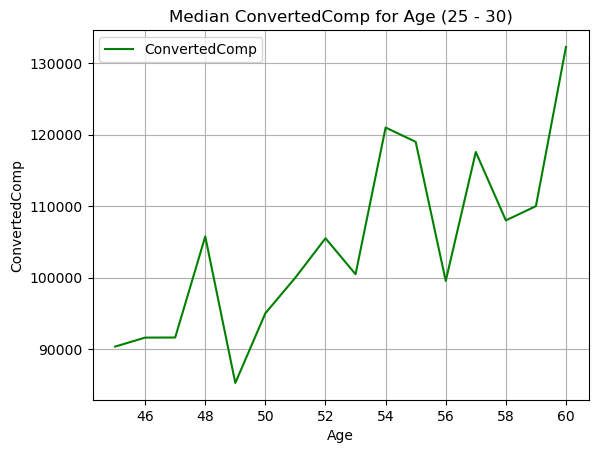

In [53]:
# your code goes here
QueryCon = """SELECT ConvertedComp, Age FROM master where Age >= 45 and Age <=60"""

LineC = pd.read_sql_query(QueryCon, conn)
LineC["Age"].astype(int)
LineC.groupby("Age").median().plot.line(color="green")

plt.title("Median ConvertedComp for Age (45 - 60)")
plt.xlabel("Age")
plt.ylabel('ConvertedComp')
plt.grid()



In [52]:
LineC.corr()

,ConvertedComp,Age
ConvertedComp,1.000000,0.062712
Age,0.062712,1.000000


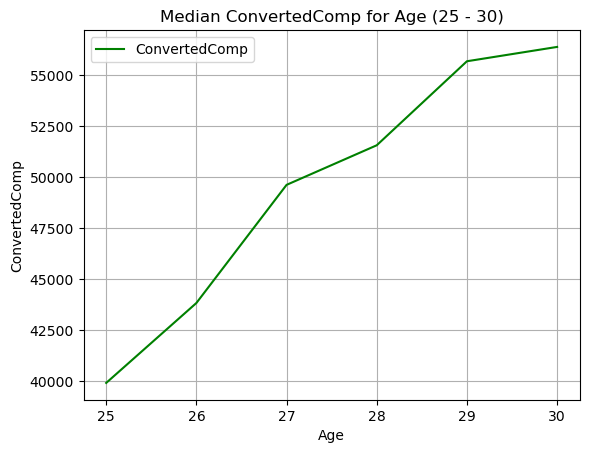

In [54]:
QueryConA = """SELECT ConvertedComp, Age FROM master where Age >= 25 and Age <=30"""

LineCA = pd.read_sql_query(QueryConA, conn)
LineCA["Age"].astype(int)
LineCA.groupby("Age").median().plot.line(color="green")

plt.title("Median ConvertedComp for Age (25 - 30)")
plt.xlabel("Age")
plt.ylabel('ConvertedComp')
plt.grid()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


Text(0, 0.5, 'MainBranch')

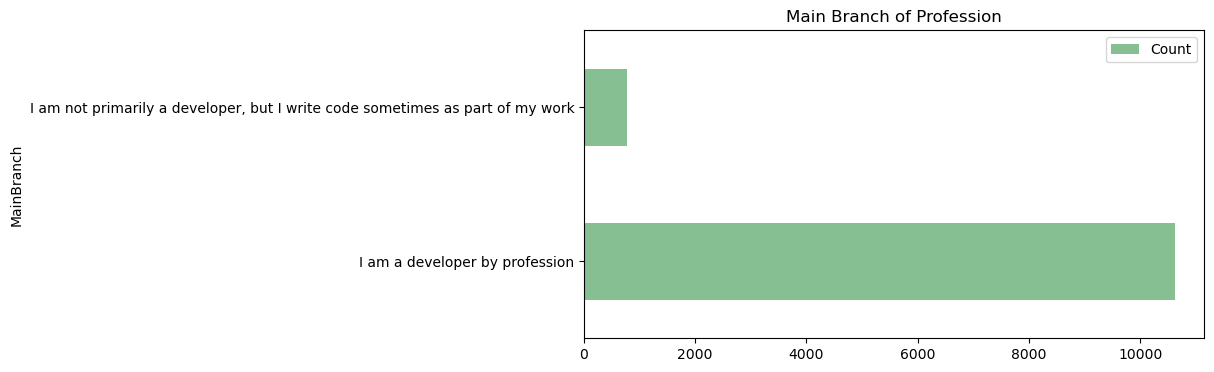

In [56]:
# your code goes here
QueryM = """SELECT MainBranch,Count(*) as Count FROM master group by MainBranch"""

BarM = pd.read_sql_query(QueryM,conn)
BarM.set_index("MainBranch", inplace=True) 

ax = BarM.plot(kind="barh", figsize=(8,4), color="#86bf91", zorder=2)
ax.set_title("Main Branch of Profession")
ax.set_ylabel("MainBranch")

Close the database connection.


In [ ]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
